In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings(action='ignore')

data = pd.read_csv("fetal_health.csv.xls")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [2]:
data.shape

(2126, 22)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
# first of all let us evaluate the target and find out if our data is imbalanced or not
data['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

<Axes: xlabel='fetal_health', ylabel='count'>

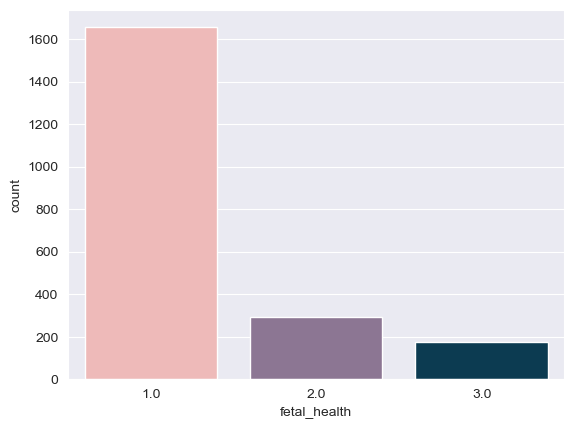

In [6]:
colours=["#f7b2b0", "#8f7198", "#003f5c"]
sns.countplot(data = data, x = "fetal_health", palette = colours)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [8]:
data.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

array([[<Axes: title={'center': 'baseline value'}>,
        <Axes: title={'center': 'accelerations'}>,
        <Axes: title={'center': 'fetal_movement'}>,
        <Axes: title={'center': 'uterine_contractions'}>,
        <Axes: title={'center': 'light_decelerations'}>],
       [<Axes: title={'center': 'severe_decelerations'}>,
        <Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_short_term_variability'}>,
        <Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<Axes: title={'center': 'mean_value_of_long_term_variability'}>,
        <Axes: title={'center': 'histogram_width'}>,
        <Axes: title={'center': 'histogram_min'}>,
        <Axes: title={'center': 'histogram_max'}>,
        <Axes: title={'center': 'histogram_number_of_peaks'}>],
       [<Axes: title={'center': 'histogram_number_of_zeroes'}>,
        <Axes: ti

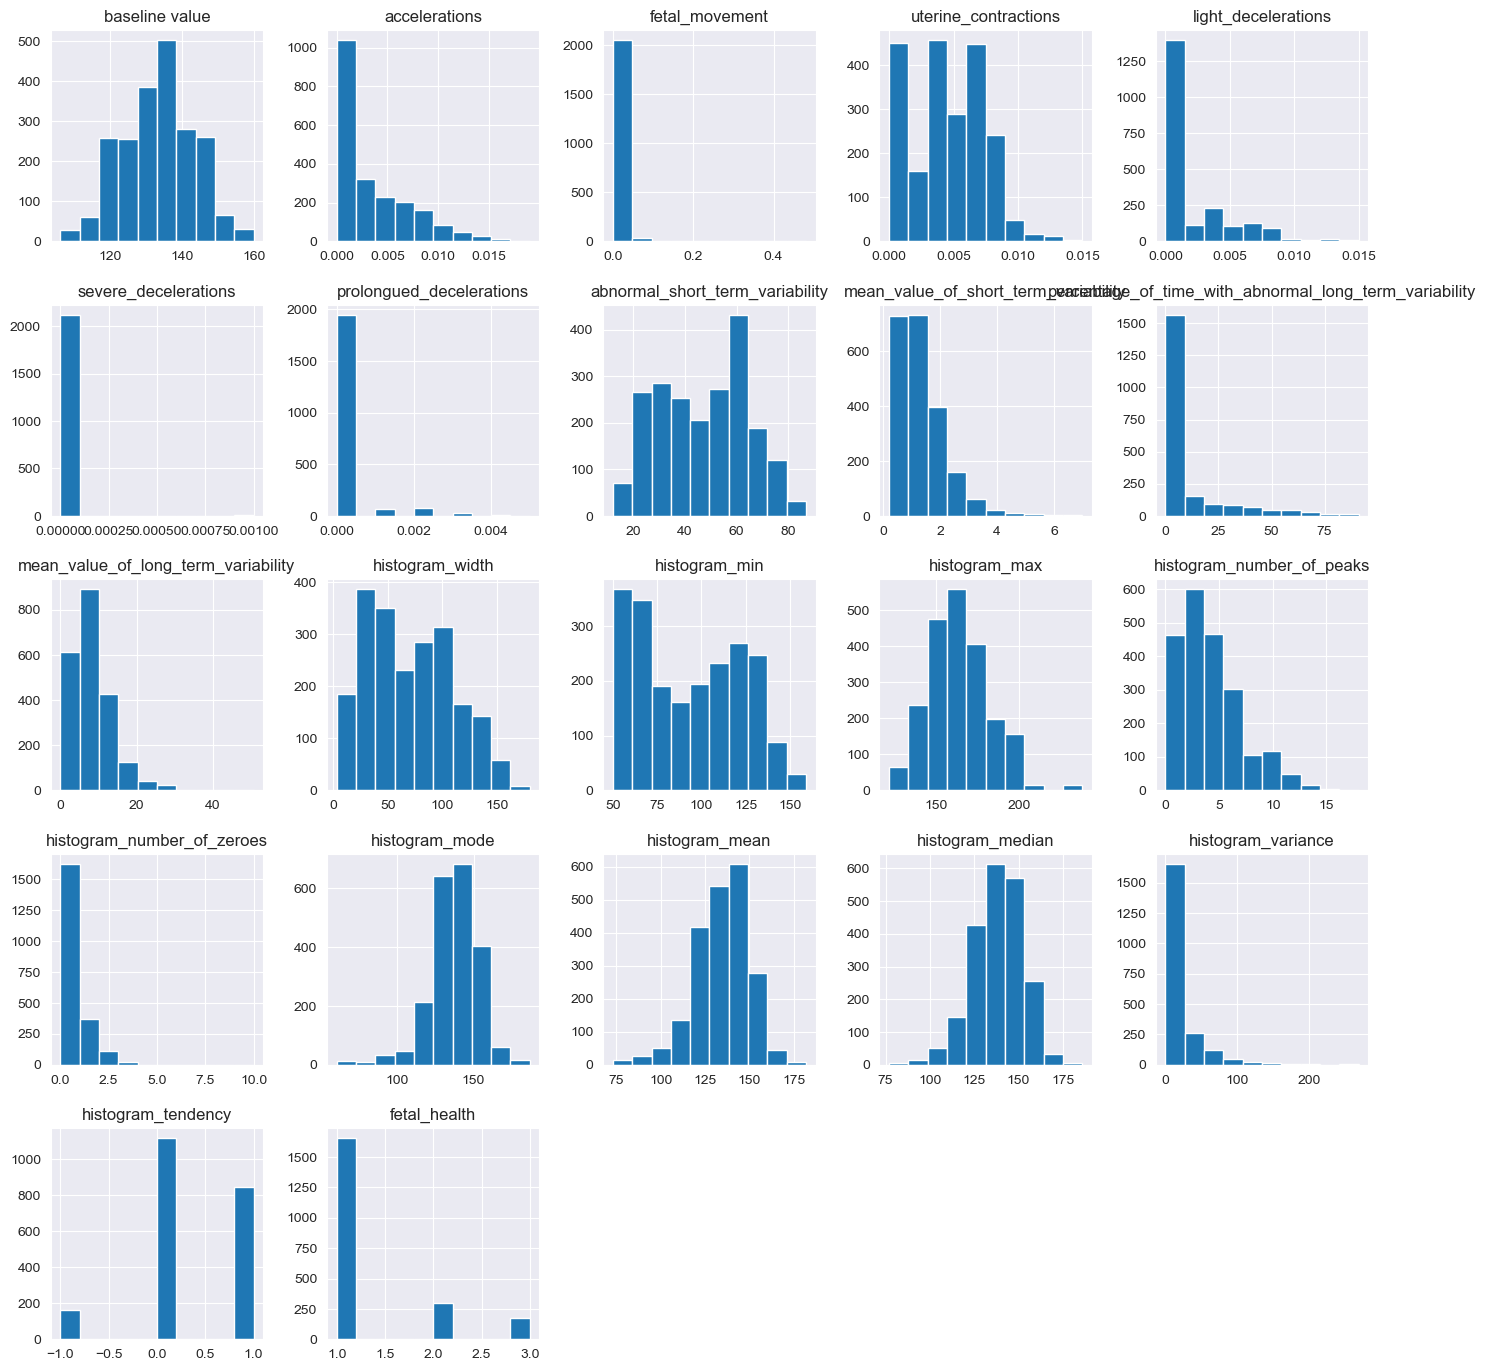

In [9]:
data.hist(figsize=(17,17), layout=(5,5), sharex=False)

baseline value                                               Axes(0.125,0.747241;0.133621x0.132759)
accelerations                                             Axes(0.285345,0.747241;0.133621x0.132759)
fetal_movement                                             Axes(0.44569,0.747241;0.133621x0.132759)
uterine_contractions                                      Axes(0.606034,0.747241;0.133621x0.132759)
light_decelerations                                       Axes(0.766379,0.747241;0.133621x0.132759)
severe_decelerations                                         Axes(0.125,0.587931;0.133621x0.132759)
prolongued_decelerations                                  Axes(0.285345,0.587931;0.133621x0.132759)
abnormal_short_term_variability                            Axes(0.44569,0.587931;0.133621x0.132759)
mean_value_of_short_term_variability                      Axes(0.606034,0.587931;0.133621x0.132759)
percentage_of_time_with_abnormal_long_term_variability    Axes(0.766379,0.587931;0.133621x0.132759)


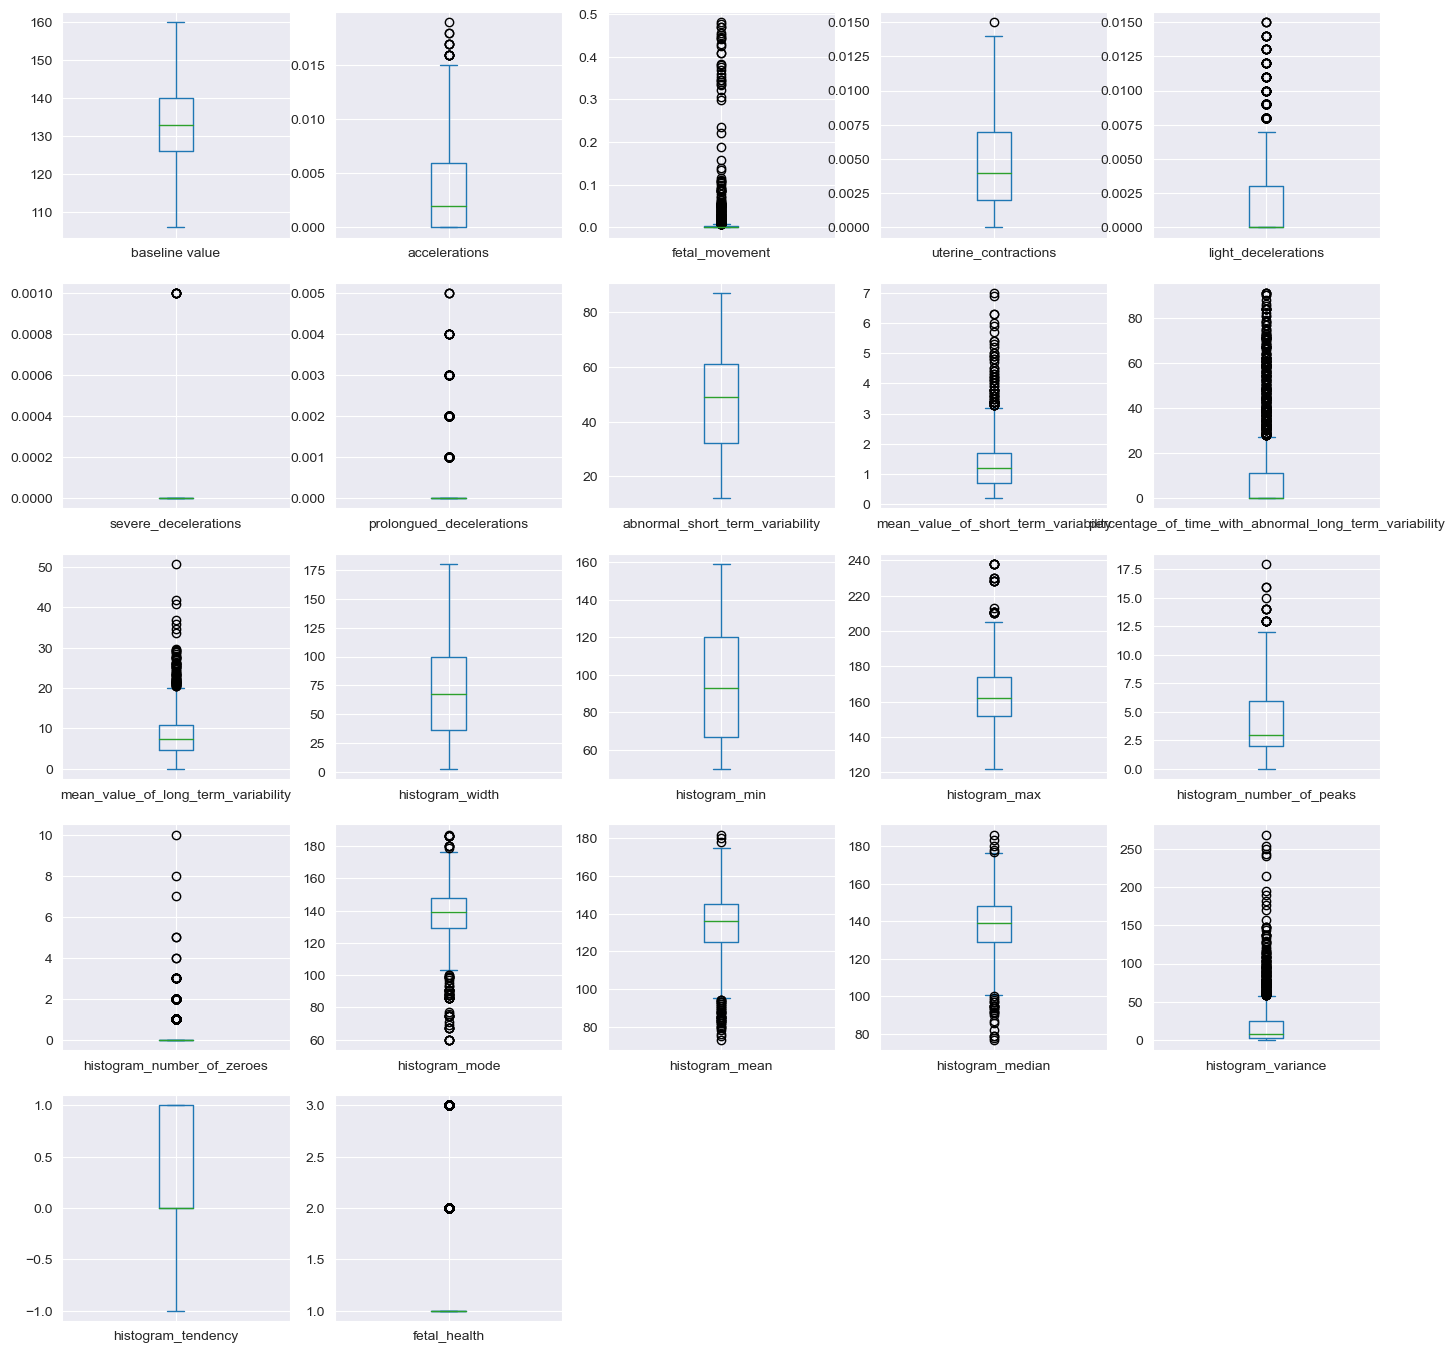

In [10]:
data.plot(kind='box', figsize=(17,17), layout=(5,5), sharex=False, subplots=True)

<Axes: xlabel='fetal_movement', ylabel='fetal_health'>

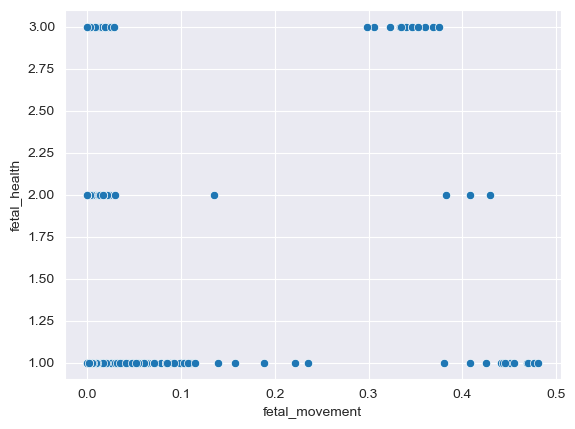

In [11]:
sns.scatterplot(x=data.fetal_movement, y=data.fetal_health)

<Axes: >

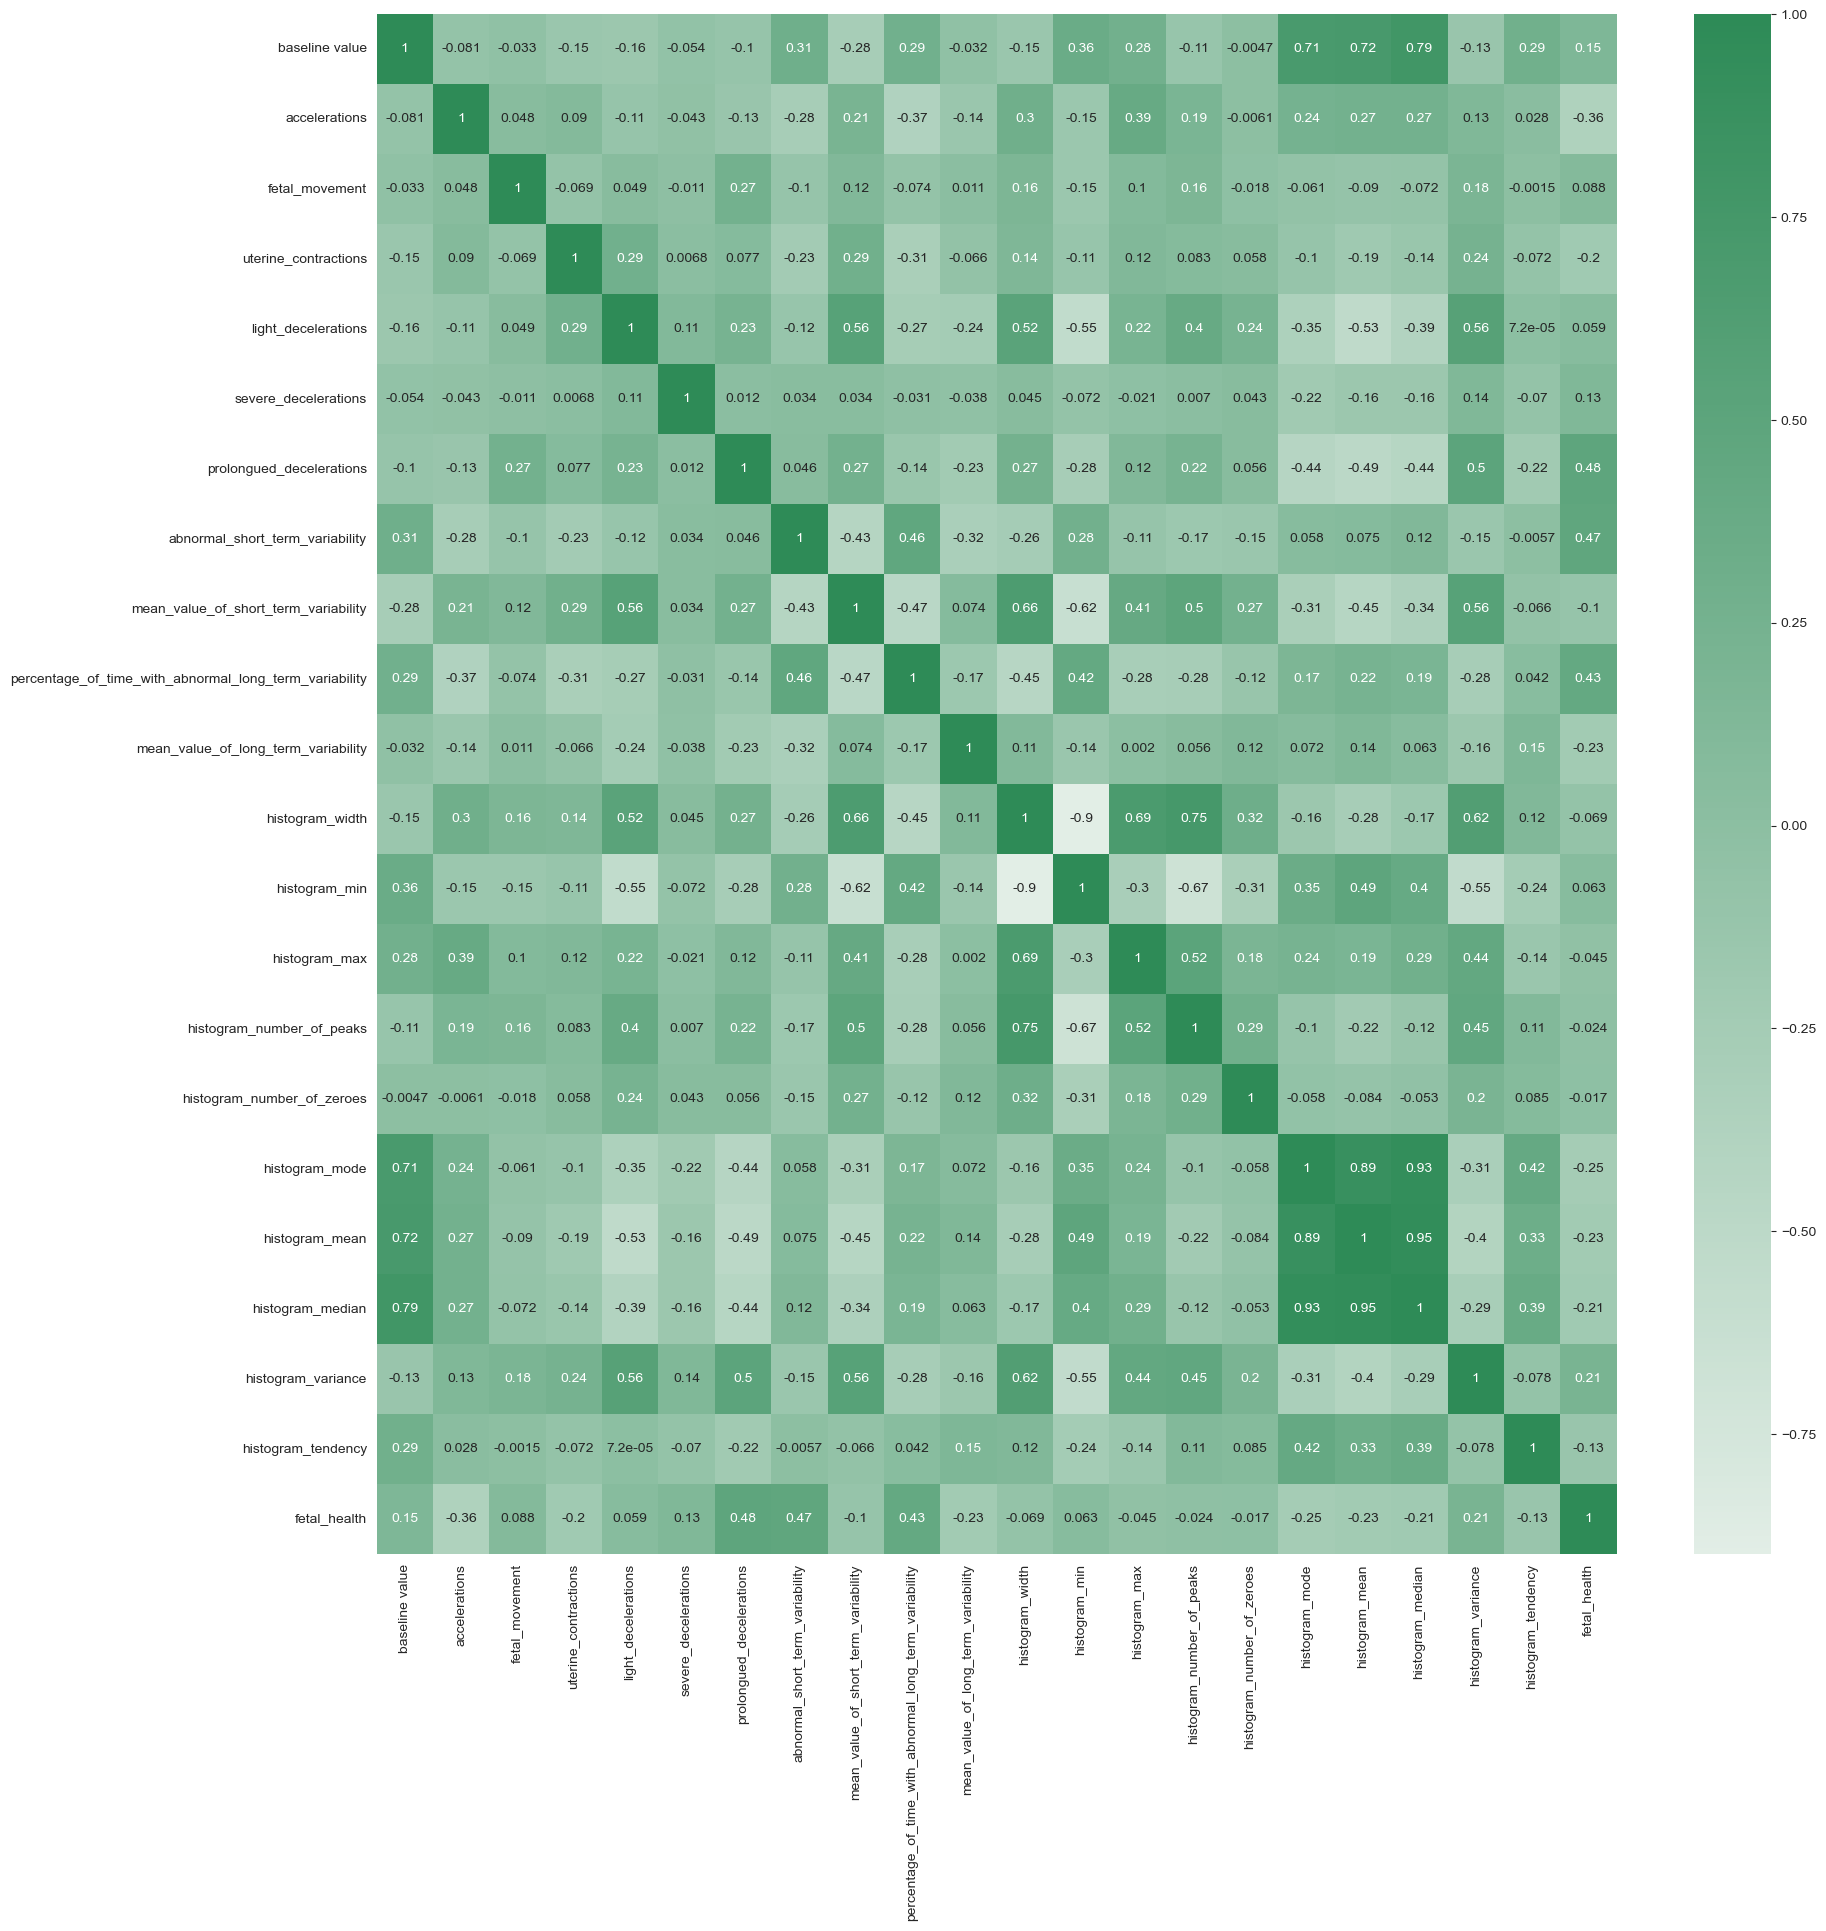

In [12]:
#correlation matrix
corrmat = data.corr()
plt.figure(figsize=(20,20))

cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)

In [13]:
data.drop(columns=["histogram_mean"], axis=1)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,151.0,4.0,1.0,2.0


In [14]:
data.corr()["fetal_health"].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [15]:
new_data=data.loc[:,["prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability", "histogram_variance", "histogram_median", "mean_value_of_short_term_variability", "histogram_mode", "accelerations"]]
new_data.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,histogram_median,mean_value_of_short_term_variability,histogram_mode,accelerations
0,0.0,73.0,43.0,73.0,121.0,0.5,120.0,0.000
1,0.0,17.0,0.0,12.0,140.0,2.1,141.0,0.006
2,0.0,16.0,0.0,13.0,138.0,2.1,141.0,0.003
3,0.0,16.0,0.0,13.0,137.0,2.4,137.0,0.003
4,0.0,16.0,0.0,11.0,138.0,2.4,137.0,0.007


In [16]:
X = new_data
y = data["fetal_health"]
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X_scaled.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,histogram_median,mean_value_of_short_term_variability,histogram_mode,accelerations
0,0.0,0.813333,0.472527,0.271375,0.403670,0.044118,0.472441,0.000000
1,0.0,0.066667,0.000000,0.044610,0.577982,0.279412,0.637795,0.315789
2,0.0,0.053333,0.000000,0.048327,0.559633,0.279412,0.637795,0.157895
3,0.0,0.053333,0.000000,0.048327,0.550459,0.323529,0.606299,0.157895
4,0.0,0.053333,0.000000,0.040892,0.559633,0.323529,0.606299,0.368421


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape

((1488, 8), (638, 8))

In [18]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
from collections import Counter
print("Before SMOTE :", Counter(y_train))
print("After SMOTE :", Counter(y_train_smote))

Before SMOTE : Counter({1.0: 1158, 2.0: 201, 3.0: 129})
After SMOTE : Counter({1.0: 1158, 2.0: 1158, 3.0: 1158})


In [19]:
RF_model= RandomForestClassifier()  
RF_model.fit(X_train_smote, y_train_smote)
predictions=RF_model.predict(X_test)
ras = accuracy_score(y_test, predictions)
print(ras)
pd.crosstab(y_test, predictions)

0.945141065830721


col_0,1.0,2.0,3.0
fetal_health,,,
1.0,480,13,4
2.0,15,78,1
3.0,0,2,45


For the amounts of training data is:  27792
Accuracy of RandomForestClassifier:  0.945141065830721


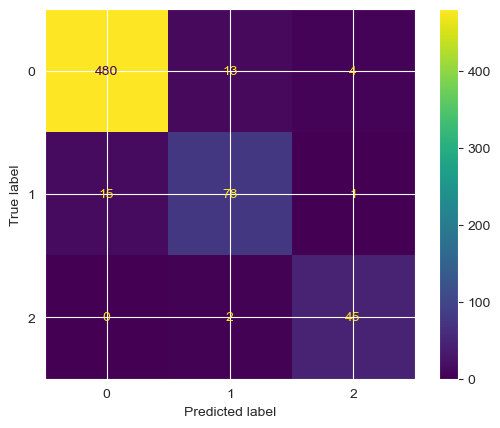

In [20]:
print("For the amounts of training data is: ", X_train_smote.size)
print("Accuracy of RandomForestClassifier: ", RF_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

In [21]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_smote, y_train_smote)
predictions = DT_model.predict(X_test)
das = accuracy_score(y_test, predictions)
print(das)

0.9278996865203761


For the amounts of training data is:  27792
Accuracy of DecisionTreeClassifier:  0.9278996865203761


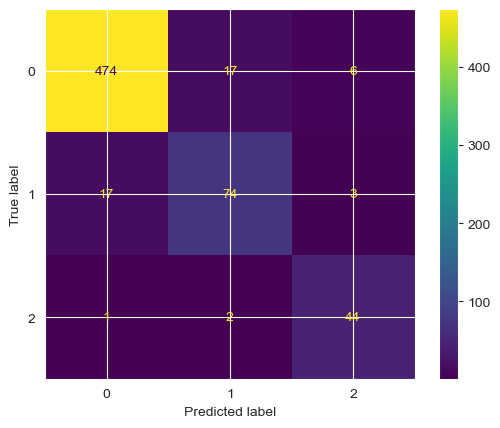

In [22]:
print("For the amounts of training data is: ", X_train_smote.size)
print("Accuracy of DecisionTreeClassifier: ", DT_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

In [23]:
LR_model = LogisticRegression()
LR_model.fit(X_train_smote, y_train_smote)
predictions = LR_model.predict(X_test)
las = accuracy_score(y_test, predictions)
print(las)

0.8087774294670846


For the amounts of training data is:  27792
Accuracy of LogisticRegression:  0.8087774294670846


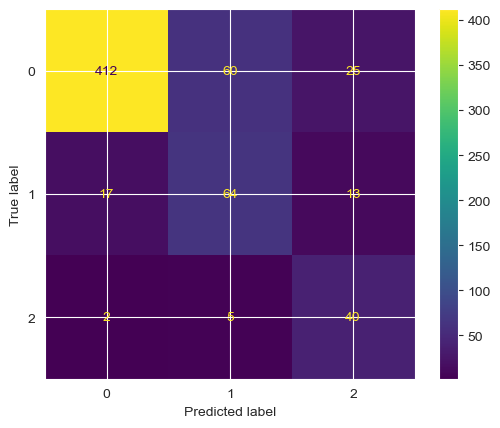

In [24]:
print("For the amounts of training data is: ", X_train_smote.size)
print("Accuracy of LogisticRegression: ", LR_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

In [25]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train_smote, y_train_smote)
predictions = KNN_model.predict(X_test)
kas  = accuracy_score(y_test, predictions)
print(kas)

0.8871473354231975


For the amounts of training data is:  27792
Accuracy of RandomForestClassifier:  0.8871473354231975


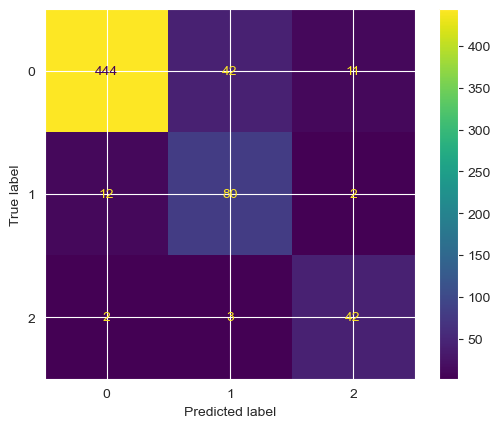

In [26]:
print("For the amounts of training data is: ", X_train_smote.size)
print("Accuracy of RandomForestClassifier: ", KNN_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

In [28]:
RF_model.predict([[0.345, 0.1225, 23346, 0.23456, 0.987, 2345, 123, 0]])

array([1.])

In [29]:
RF_model.predict([[0.000, 0.0, 73.0, 43.0, 2.4, 73.0, 120.0, 121.0]])

array([1.])

In [30]:
df = pd.DataFrame()
df['name'] = ['Random Forest Classifier', 'Logistic Regression', 'Decision Tree Classifier', 'K Neighbors Classifier']
df['score'] = [ras, das, las, kas]
df

,name,score
0,Random Forest Classifier,0.945141
1,Logistic Regression,0.927900
2,Decision Tree Classifier,0.808777
3,K Neighbors Classifier,0.887147


In [31]:
CM = sns.light_palette("red", as_cmap = True)
C = df.style.background_gradient(cmap=CM)
C

,name,score
0,Random Forest Classifier,0.945141
1,Logistic Regression,0.927900
2,Decision Tree Classifier,0.808777
3,K Neighbors Classifier,0.887147


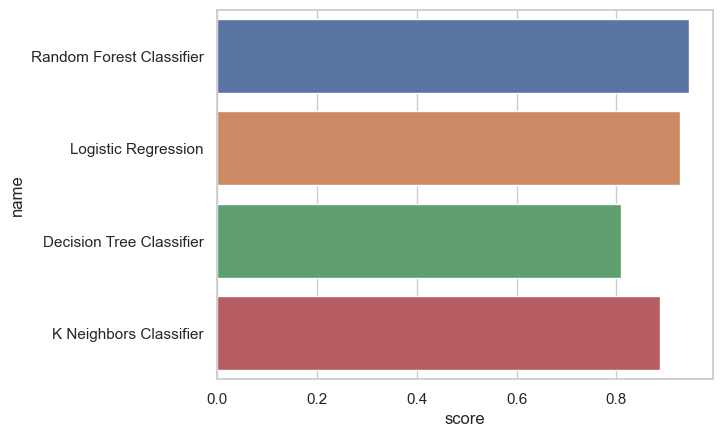

In [32]:
sns.set(style = "whitegrid")
ax = sns.barplot(y = "name", x = "score", data = df)

In [33]:
# saving the model
import pickle
pickle.dump(RF_model, open('fetal_health.pkl', 'wb'))